In [ ]:
#access gdrive folder: 20_440Project_JS_TF_AMB must be in MyDrive
from google.colab import drive

drive.mount("/content/drive")
%cd /content/drive/My Drive/20_440Project_JS_TF_AMB

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/11ayn8NvvhQcP_j3xRQ6p0HIXj3agZbuK/20_440Project_JS_TF_AMB


# Install and load dependencies

In [ ]:
%pip install pydeseq2
%pip install scanpy
%pip install sanbomics
%pip install bioinfokit
%pip install gseapy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 kB 449.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 8.8 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8026 sha256=e660b85f2f82ee2eef66b4e55d65bc9ee970f530c72e00b2b1bcacd033d4e44e
  Stored in directory: /root/.cache/pip/wheels/6a/aa/b9/eb5d4031476ec10802795b97ccf937b9bd998d68a9b268765a
Successfully built session-info
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.7/87.7 kB 2.5 MB/s eta 0:00:00
  Preparing metada

In [ ]:
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats
from functools import reduce
from sanbomics.plots import volcano
from bioinfokit import analys,visuz
from gseapy.plot import gseaplot

import pandas as pd
import seaborn as sns
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import sys
import gseapy as gp

# Data cleaning

In [ ]:
primary = pd.read_csv('dataset/MetaData/MetaData_unDiffs_TF5.tsv', delimiter='\t')
primary.set_index(primary.columns[0], inplace=True)
primary.sort_index(inplace=True)
primary = primary.iloc[:5]
primary

,A1BG,NAT2,ADA,CDH2,AKT3,MED6,NR2E3,NAALAD2,DDTL,NAALADL1,...,HNRNPDL,DMTF1,PPP4R1,CDH1,SLC12A6,PTBP3,KCNE2,DGCR2,CASP8AP2,SCO2
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
p0,22.000000,0.000000,10.000000,599.000000,1.000000,28.000000,0.000000,2.000000,0.000000,2.000000,...,320.000000,23.000000,54.000000,1.000000,22.000000,82.000000,0.000000,22.000000,46.000000,0.00000
p1,32.000000,0.000000,0.000000,324.000000,1.000000,41.000000,0.000000,1.000000,0.000000,7.000000,...,372.000000,19.000000,24.000000,1.000000,13.000000,53.000000,0.000000,8.000000,31.000000,0.00000
p2,27.000000,0.000000,0.000000,273.000000,0.000000,47.000000,0.000000,0.000000,0.000000,0.000000,...,390.000000,15.000000,22.000000,0.000000,13.000000,45.000000,0.000000,12.000000,34.000000,0.00000
p3,2.714519,0.372272,5.314518,55.878970,15.470663,47.299238,0.187662,0.041770,1.604906,0.229736,...,242.614697,23.793398,73.066969,0.140212,7.540752,45.922459,0.249611,21.598819,15.593893,32.51673
p4,4.861186,0.376624,5.453118,52.306781,13.908955,40.647604,0.118133,0.082169,1.668771,0.443715,...,253.847699,22.738831,67.290060,0.220657,6.260969,42.135468,0.687440,26.719813,14.672452,43.00898


In [ ]:
diff = pd.read_csv('new_primary_TF/primary_and_goodDiffs_metadata.tsv', delimiter='\t')
diff.set_index(diff.columns[0], inplace=True)
diff.sort_index(inplace=True)
diff = diff.iloc[:-5]
diff

,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,AAAS,...,ZSWIM8-AS1,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
e0,3.983400,0.722946,0.257453,73.563100,2.798250,0.032888,0.000000,0.000000,6.767160,13.914200,...,1.330300,9.511060,11.938800,14.343700,3.447220,4.062020,13.323100,19.396400,7.465260,4.124640
e1,6.664340,0.426933,0.151832,63.272900,1.993800,0.000000,0.395247,0.424968,11.937100,17.293400,...,0.891058,8.657570,12.445500,13.961800,2.244150,3.778270,9.194340,19.858100,5.005760,3.766700
e2,99.000000,123.000000,1963.000000,84977.000000,335.000000,20.000000,2.000000,2.000000,505.000000,4296.000000,...,23.000000,1431.000000,1923.000000,2875.000000,461.000000,1637.000000,3171.000000,5105.000000,3784.000000,3975.000000
e3,162.000000,60.000000,2490.000000,38794.000000,138.000000,20.000000,4.000000,1.000000,420.000000,4394.000000,...,13.000000,1210.000000,1023.000000,1024.000000,499.000000,1438.000000,3531.000000,6024.000000,3798.000000,3608.000000
e4,172.000000,76.000000,3419.000000,34128.000000,269.000000,7.000000,0.000000,1.000000,666.000000,4644.000000,...,17.000000,988.000000,1146.000000,975.000000,282.000000,1116.000000,2862.000000,4480.000000,6295.000000,4229.000000
i0,177.020808,31.450397,3.594331,131.193086,201.282543,1.797166,5.391497,0.000000,25.160318,8.985828,...,660.458346,3.594331,26.957484,19.768821,8.985828,23.363152,9.884411,7.188662,56.610715,10.782993
i1,138.247704,21.057597,10.986573,101.625796,103.456891,4.577739,1.831095,0.000000,20.142050,9.155477,...,747.086930,0.000000,18.310954,21.973145,6.408834,25.635336,13.733216,4.577739,30.213074,10.071025
i10,152.820677,24.752645,18.295433,108.696397,105.467791,0.000000,2.152404,0.000000,30.133655,7.533414,...,830.827905,2.152404,15.066827,23.676443,21.524039,21.524039,6.457212,23.676443,35.514664,13.990625
i2,232.240488,31.225612,9.758004,86.846233,183.450469,3.903201,7.806403,0.000000,15.612806,1.951601,...,707.455268,4.879002,25.370810,22.443408,19.516007,24.395009,22.443408,9.758004,43.911017,14.637006


In [ ]:
merged = pd.concat([diff, primary])
merged = merged.dropna(axis=1)
merged

,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,AAAS,AACS,AADAC,AADACL2,...,ZSWIM8,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
e0,3.983400,0.257453,73.563100,0.032888,0.000000,6.767160,13.914200,5.439710,0.231934,0.000000,...,8.491120,9.511060,11.938800,14.343700,3.447220,4.062020,13.323100,19.396400,7.465260,4.124640
e1,6.664340,0.151832,63.272900,0.000000,0.424968,11.937100,17.293400,6.386410,0.118853,0.000000,...,7.615130,8.657570,12.445500,13.961800,2.244150,3.778270,9.194340,19.858100,5.005760,3.766700
e2,99.000000,1963.000000,84977.000000,20.000000,2.000000,505.000000,4296.000000,2635.000000,32.000000,0.000000,...,4122.000000,1431.000000,1923.000000,2875.000000,461.000000,1637.000000,3171.000000,5105.000000,3784.000000,3975.000000
e3,162.000000,2490.000000,38794.000000,20.000000,1.000000,420.000000,4394.000000,2433.000000,25.000000,0.000000,...,3109.000000,1210.000000,1023.000000,1024.000000,499.000000,1438.000000,3531.000000,6024.000000,3798.000000,3608.000000
e4,172.000000,3419.000000,34128.000000,7.000000,1.000000,666.000000,4644.000000,3071.000000,26.000000,0.000000,...,4327.000000,988.000000,1146.000000,975.000000,282.000000,1116.000000,2862.000000,4480.000000,6295.000000,4229.000000
i0,177.020808,3.594331,131.193086,1.797166,0.000000,25.160318,8.985828,19.768821,0.000000,0.000000,...,298.329484,3.594331,26.957484,19.768821,8.985828,23.363152,9.884411,7.188662,56.610715,10.782993
i1,138.247704,10.986573,101.625796,4.577739,0.000000,20.142050,9.155477,3.662191,0.000000,0.915548,...,337.837105,0.000000,18.310954,21.973145,6.408834,25.635336,13.733216,4.577739,30.213074,10.071025
i10,152.820677,18.295433,108.696397,0.000000,0.000000,30.133655,7.533414,2.152404,0.000000,0.000000,...,449.852415,2.152404,15.066827,23.676443,21.524039,21.524039,6.457212,23.676443,35.514664,13.990625
i2,232.240488,9.758004,86.846233,3.903201,0.000000,15.612806,1.951601,9.758004,0.000000,0.000000,...,338.602728,4.879002,25.370810,22.443408,19.516007,24.395009,22.443408,9.758004,43.911017,14.637006


# Run DeSeq2

In [ ]:
merged *= 100
merged = merged.astype(int)

In [ ]:
labels = ['Differentiated'] * 16 + ['Primary'] * 5

metadata = pd.DataFrame(zip(merged.index, labels),
                        columns = ['Sample', 'Condition'])
metadata = metadata.set_index('Sample')

In [ ]:
dds = DeseqDataSet(counts=merged,
            metadata=metadata,
            design_factors="Condition",
            ref_level = ["Condition", "Primary"])

In [ ]:
dds.deseq2()

Fitting size factors...
... done in 0.03 seconds.

Fitting dispersions...
... done in 45.79 seconds.

Fitting dispersion trend curve...
... done in 4.85 seconds.

Fitting MAP dispersions...
... done in 56.54 seconds.

Fitting LFCs...
... done in 37.29 seconds.

Replacing 1026 outlier genes.

Fitting dispersions...
... done in 1.82 seconds.

Fitting MAP dispersions...
... done in 2.00 seconds.

Fitting LFCs...
... done in 5.23 seconds.



In [ ]:
stat_res = DeseqStats(dds, contrast = ('Condition','Primary','Differentiated'))

stat_res.summary()
res = stat_res.results_df

Running Wald tests...


Log2 fold change & Wald test p-value: Condition Primary vs Differentiated
             baseMean  log2FoldChange     lfcSE      stat        pvalue  \
A1BG     10312.340885       -2.464994  1.206713 -2.042735  4.107867e-02   
A1CF      1099.749973      -12.636913  2.002460 -6.310694  2.777878e-10   
A2M      17769.772481       -5.368196  0.815645 -6.581533  4.656213e-11   
A2ML1      146.315574       -9.727080  2.251966 -4.319373  1.564732e-05   
A3GALT2      1.873825        3.471071  3.460116  1.003166  3.157807e-01   
...               ...             ...       ...       ...           ...   
ZXDB      2084.329175       -1.653158  0.525991 -3.142938  1.672615e-03   
ZXDC      2614.986088       -1.444965  0.269193 -5.367765  7.971842e-08   
ZYG11B    4128.949808        0.225123  0.552722  0.407298  6.837890e-01   
ZYX      10020.989373        0.496028  0.714287  0.694437  4.874083e-01   
ZZEF1     2047.131289       -0.798189  0.358196 -2.228359  2.585657e-02   

                 padj  
A

... done in 6.35 seconds.



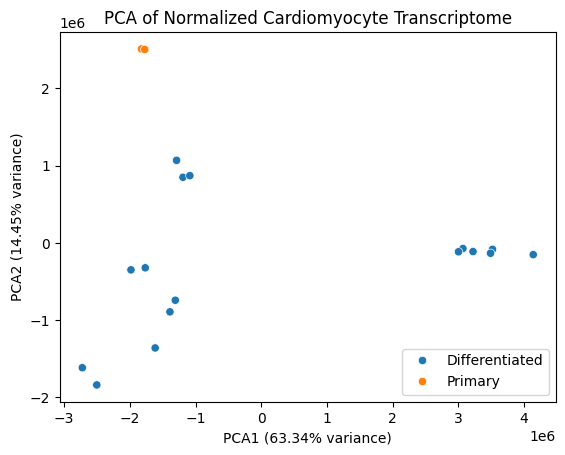

In [ ]:
from sklearn.decomposition import PCA

df = pd.DataFrame(dds.layers['normed_counts'])
pca = PCA(n_components=2)
dds_pca = pca.fit_transform(df)

explained_variances = pca.explained_variance_ratio_

df_pca = pd.DataFrame(data=dds_pca, columns=['PC1', 'PC2'])
df_pca['Metadata'] = metadata['Condition'].values

# Plot PCA results
sns.scatterplot(x='PC1', y='PC2', hue='Metadata', data=df_pca)
plt.xlabel(f'PCA1 ({explained_variances[0]*100:.2f}% variance)')
plt.ylabel(f'PCA2 ({explained_variances[1]*100:.2f}% variance)')
plt.title('PCA of Normalized Cardiomyocyte Transcriptome')
plt.legend(loc='lower right')
plt.show()

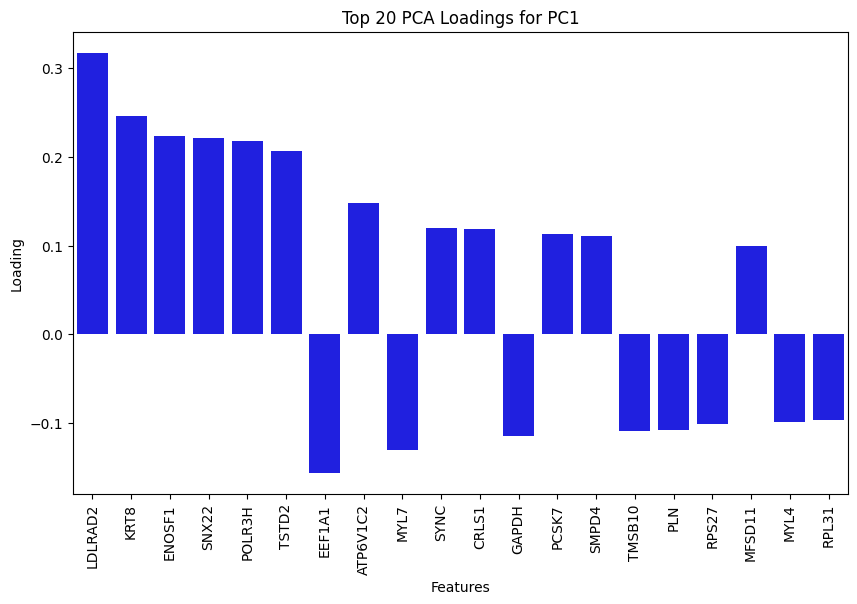

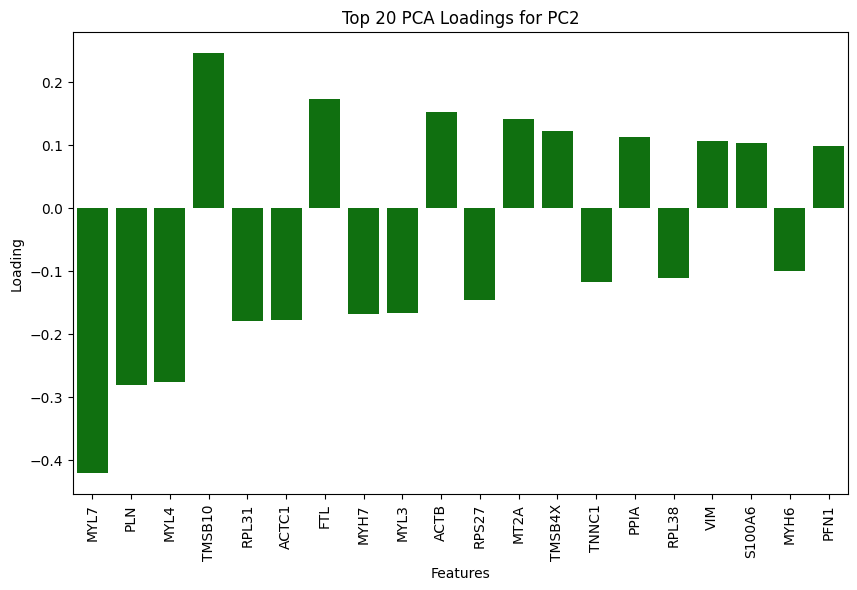

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Extract feature names from the merged DataFrame columns
feature_names = merged.columns.tolist()

# Assuming dds is your AnnData object with gene expression data
df = dds.layers['normed_counts']
pca = PCA(n_components=2)
dds_pca = pca.fit_transform(df)

# Get the PCA loadings
loadings = pca.components_.T  # Transpose to align with original features

# Create a DataFrame for loadings
loadings_df = pd.DataFrame(data=loadings, columns=['PC1', 'PC2'], index=feature_names)

# Sort the DataFrame based on absolute values of loadings
loadings_df_abs = loadings_df.abs()
top_20_pc1 = loadings_df_abs['PC1'].nlargest(20).index
top_20_pc2 = loadings_df_abs['PC2'].nlargest(20).index

# Filter the top 20 features for PC1 and PC2 separately
top_20_pc1_loadings_df = loadings_df.loc[top_20_pc1]
top_20_pc2_loadings_df = loadings_df.loc[top_20_pc2]

# Plot PCA loadings for PC1 and PC2 separately
plt.figure(figsize=(10, 6))
sns.barplot(x=top_20_pc1_loadings_df.index, y='PC1', data=top_20_pc1_loadings_df, color='blue')
plt.title('Top 20 PCA Loadings for PC1')
plt.xlabel('Features')
plt.ylabel('Loading')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=top_20_pc2_loadings_df.index, y='PC2', data=top_20_pc2_loadings_df, color='green')
plt.title('Top 20 PCA Loadings for PC2')
plt.xlabel('Features')
plt.ylabel('Loading')
plt.xticks(rotation=90)
plt.show()


# Heat Map

In [ ]:
sys.setrecursionlimit(10000)  # Set a higher recursion limit (adjust the value as needed)

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


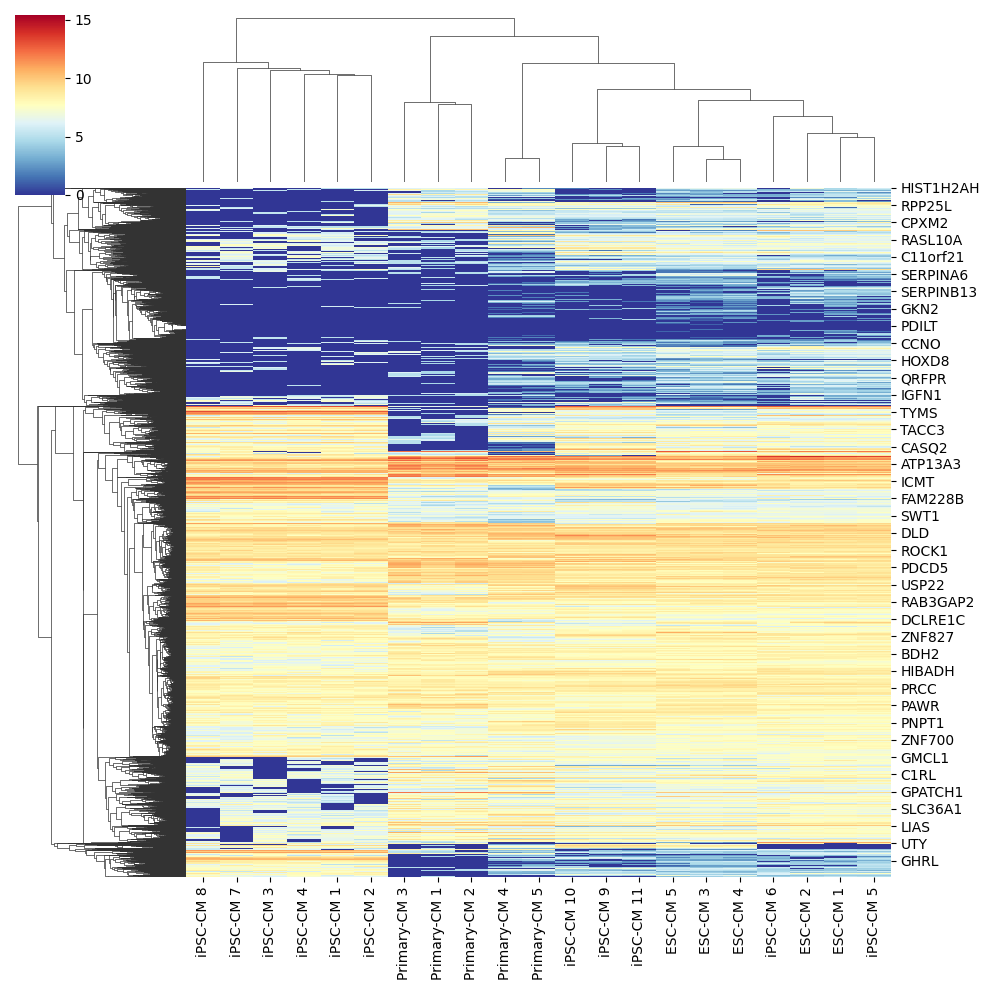

In [ ]:
dds.layers['log1p'] = np.log1p(dds.layers['normed_counts'])
dds_res = dds[:, res.index]

pattern_repetitions = {'ESC-CM': 5, 'iPSC-CM': 11, 'Primary-CM': 5}
col_labels = [f'{pattern} {i}' for pattern, repetitions in pattern_repetitions.items() for i in range(1, repetitions + 1)]

grapher_res = pd.DataFrame(dds_res.layers['log1p'].T,
                       index=dds_res.var_names, columns=col_labels)

sns.clustermap(grapher_res, cmap='RdYlBu_r')

# Heatmap of cardiac genes

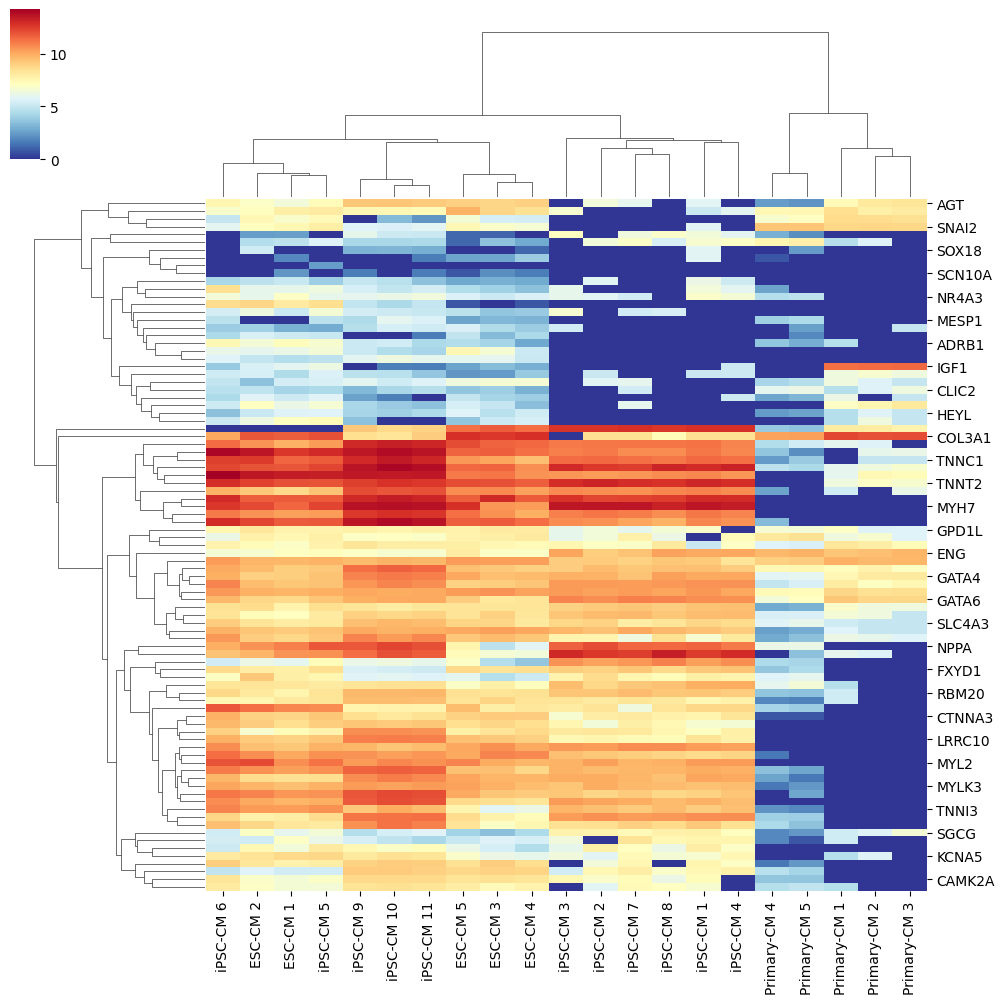

In [ ]:
cardiac_genes = pd.read_csv('dataset/cardiac_genes.csv', delimiter='\t')
common_genes = cardiac_genes['Gene'][cardiac_genes['Gene'].isin(grapher_res.index)]
subset_grapher_res = grapher_res.loc[common_genes]

sns.clustermap(subset_grapher_res, cmap='RdYlBu_r',cbar_pos=(0, .85, .03, .15))